In [4]:
import random
import itertools
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Initialize the population with binary-encoded individuals
def initialize_population(pop_size, rule_length):
    return [random.choices([0, 1], k=rule_length) for _ in range(pop_size)]

# Fitness function: evaluates how well an individual matches the examples
def fitness(individual, examples):
    correct = 0
    for example in examples:
        if evaluate_rule(individual, example) == (example['PlayTennis'] == 'Yes'):
            correct += 1
    return correct / len(examples)

# Evaluate whether a rule matches an example
def evaluate_rule(rule, example):
    attributes = ['Outlook', 'Temperature', 'Humidity', 'Wind']
    value_map = {
        'Outlook': ['Sunny', 'Overcast', 'Rainy'],
        'Temperature': ['Hot', 'Mild', 'Cool'],
        'Humidity': ['High', 'Normal'],
        'Wind': ['Strong', 'Weak']
    }
    
    index = 0  # Tracks the current bit index in the rule
    for attr in attributes:
        num_values = len(value_map[attr])  # Get the correct number of values for this attribute
        
        if any(rule[index:index + num_values]):  # If the attribute is not "don't care"
            attr_value = example[attr]  # Get the attribute value from the example
            valid_values = [value_map[attr][j] for j in range(num_values) if rule[index + j] == 1]
            if attr_value not in valid_values:
                return False
        
        index += num_values  # Move index forward to the next attribute section

    return True

# Perform crossover between two parents to produce two children
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Mutate an individual with a given mutation rate
def mutate(individual, mutation_rate):
    return [1 - bit if random.random() < mutation_rate else bit for bit in individual]

# Main genetic algorithm function
def genetic_algorithm(examples, pop_size, generations, replacement_rate, mutation_rate):
    rule_length = 10  # Corrected rule length: 3 (Outlook) + 3 (Temperature) + 2 (Humidity) + 2 (Wind)
    population = initialize_population(pop_size, rule_length)
    
    for _ in range(generations):
        fitnesses = [fitness(individual, examples) for individual in population]
        sorted_population = [x for _, x in sorted(zip(fitnesses, population), reverse=True)]
        
        # Keep the best individuals before mutation
        new_population = sorted_population[:int((1 - replacement_rate) * pop_size)]
        
        while len(new_population) < pop_size:
            parent1, parent2 = random.choices(sorted_population[:int(pop_size / 2)], k=2)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            new_population.extend([child1, child2])
        
        # Ensure population doesn't exceed pop_size
        population = new_population[:pop_size]
    
    best_individual = max(population, key=lambda x: fitness(x, examples))
    return best_individual, fitness(best_individual, examples)

# Interpret the best rule
def interpret_rule(rule):
    attributes = ['Outlook', 'Temperature', 'Humidity', 'Wind']
    value_map = {
        'Outlook': ['Sunny', 'Overcast', 'Rainy'],
        'Temperature': ['Hot', 'Mild', 'Cool'],
        'Humidity': ['High', 'Normal'],
        'Wind': ['Strong', 'Weak']
    }
    
    interpretation = []
    index = 0

    for attr in attributes:
        num_values = len(value_map[attr])  # Get number of values for this attribute
        if any(rule[index:index + num_values]):  # If at least one bit is set
            selected_values = [value_map[attr][j] for j in range(num_values) if rule[index + j] == 1]
            interpretation.append(f"{attr} is {' or '.join(selected_values)}")
        index += num_values  # Move index to the next attribute's section

    return " AND ".join(interpretation)



In [8]:
# Example dataset
examples = [
    {'Outlook': 'Sunny', 'Temperature': 'Hot', 'Humidity': 'High', 'Wind': 'Weak', 'PlayTennis': 'No'},
    {'Outlook': 'Sunny', 'Temperature': 'Hot', 'Humidity': 'High', 'Wind': 'Strong', 'PlayTennis': 'No'},
    {'Outlook': 'Overcast', 'Temperature': 'Hot', 'Humidity': 'High', 'Wind': 'Weak', 'PlayTennis': 'Yes'},
    {'Outlook': 'Rain', 'Temperature': 'Mild', 'Humidity': 'High', 'Wind': 'Weak', 'PlayTennis': 'Yes'},
    {'Outlook': 'Rain', 'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': 'Weak', 'PlayTennis': 'Yes'},
    {'Outlook': 'Rain', 'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': 'Strong', 'PlayTennis': 'No'},
    {'Outlook': 'Overcast', 'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': 'Strong', 'PlayTennis': 'Yes'},
    {'Outlook': 'Sunny', 'Temperature': 'Mild', 'Humidity': 'High', 'Wind': 'Weak', 'PlayTennis': 'No'},
    {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': 'Weak', 'PlayTennis': 'Yes'},
    {'Outlook': 'Rain', 'Temperature': 'Mild', 'Humidity': 'Normal', 'Wind': 'Weak', 'PlayTennis': 'Yes'},
    {'Outlook': 'Sunny', 'Temperature': 'Mild', 'Humidity': 'Normal', 'Wind': 'Strong', 'PlayTennis': 'Yes'},
    {'Outlook': 'Overcast', 'Temperature': 'Mild', 'Humidity': 'High', 'Wind': 'Strong', 'PlayTennis': 'Yes'},
    {'Outlook': 'Overcast', 'Temperature': 'Hot', 'Humidity': 'Normal', 'Wind': 'Weak', 'PlayTennis': 'Yes'},
    {'Outlook': 'Rain', 'Temperature': 'Mild', 'Humidity': 'High', 'Wind': 'Strong', 'PlayTennis': 'No'},
]


# Run the genetic algorithm
pop_size = 50
generations = 100
replacement_rate = 0.5
mutation_rate = 0.01

best_rule, best_fitness = genetic_algorithm(examples, pop_size, generations, replacement_rate, mutation_rate)
print(f"Best rule: {best_rule}")
print(f"Fitness: {best_fitness}")
print(f"Interpretation: IF {interpret_rule(best_rule)} THEN PlayTennis = Yes")


Best rule: [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
Fitness: 0.7142857142857143
Interpretation: IF Humidity is Normal AND Wind is Strong or Weak THEN PlayTennis = Yes


In [9]:
# Experimentation with different values for pop_size, replacement_rate, and mutation_rate
pop_sizes = [20, 50, 100]
replacement_rates = [0.3, 0.5, 0.7]
mutation_rates = [0.01, 0.05, 0.1]
generations = 100

In [12]:
# Run experiments
results = []
for p, r, m in itertools.product(pop_sizes, replacement_rates, mutation_rates):
    best_rule, best_fitness = genetic_algorithm(examples, p, generations, r, m)
    results.append({'Population Size': p, 'Replacement Rate': r, 'Mutation Rate': m, 'Best Fitness': best_fitness})

# Convert results to DataFrame
df_results = pd.DataFrame(results)

df_results.head(30)

,Population Size,Replacement Rate,Mutation Rate,Best Fitness
0,20,0.3,0.01,0.642857
1,20,0.3,0.05,0.642857
2,20,0.3,0.10,0.714286
3,20,0.5,0.01,0.642857
4,20,0.5,0.05,0.642857
5,20,0.5,0.10,0.642857
6,20,0.7,0.01,0.642857
7,20,0.7,0.05,0.714286
8,20,0.7,0.10,0.714286
9,50,0.3,0.01,0.714286


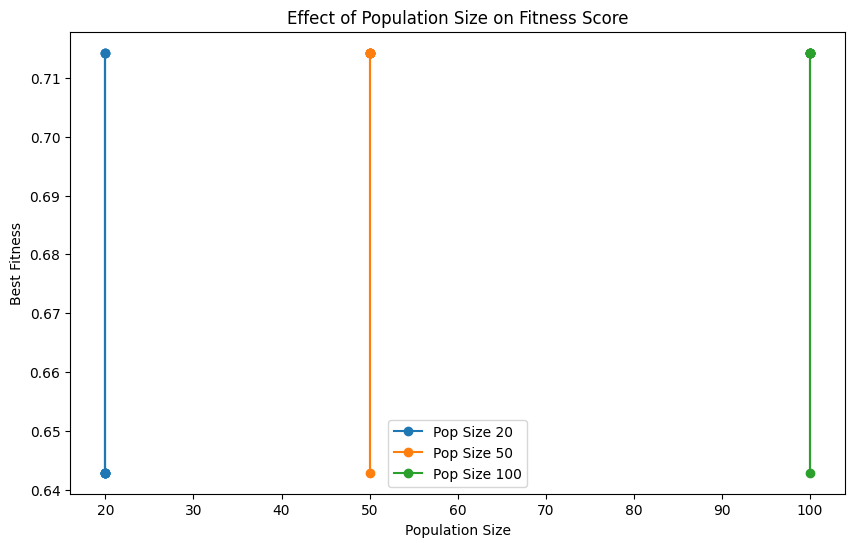

In [14]:
# Plot results
plt.figure(figsize=(10, 6))
for p in pop_sizes:
    subset = df_results[df_results['Population Size'] == p]
    plt.plot(subset['Population Size'], subset['Best Fitness'], marker='o', linestyle='-', label=f'Pop Size {p}')
plt.xlabel("Population Size")
plt.ylabel("Best Fitness")
plt.title("Effect of Population Size on Fitness Score")
plt.legend()
plt.show()

# plt.figure(figsize=(10, 6))
# for r in replacement_rates:
#     subset = df_results[df_results['Replacement Rate'] == r]
#     plt.plot(subset['Population Size'], subset['Best Fitness'], marker='s', linestyle='-', label=f'Replacement Rate {r}')
# plt.xlabel("Population Size")
# plt.ylabel("Best Fitness")
# plt.title("Effect of Population Size on Fitness Score")
# plt.legend()
# plt.show()